In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import jlat_utils as jlat

### Data location

In [2]:
basepath="/project/cas/islas/GEOconsort/"

### pull out DJF climatology of 700hPa zonal mean zonal wind

In [20]:
model='GFDL-CM3'
uctrl = xr.open_dataset(basepath+"/"+model+'/PI_atmos.510101-525012.ucomp.nc')
uctrl = uctrl.ucomp
uctrlzm_700 = uctrl.mean('lon').sel(level=700, method='nearest')
uctrlzm_700_djf = uctrlzm_700.where( uctrlzm_700['time.season'] == 'DJF').mean('time')

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/xarray/coding/times.py:517: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


### Calculate the jet latitude

In [27]:
jlat_sh, jspeed_sh = jlat.calcjetlat(uctrlzm_700_djf,-70,-20)
jlat_nh, jspeed_nh = jlat.calcjetlat(uctrlzm_700_djf,20,70)

### Plot the zonal mean zonal wind and the latitude and speed of the jet maximum

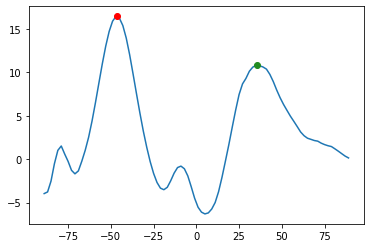

In [29]:
plt.plot(uctrlzm_700_djf.lat,uctrlzm_700_djf)
plt.plot(jlat_sh,jspeed_sh,"o", color='red')
plt.plot(jlat_nh,jspeed_nh,"o",color='forestgreen')